# Data Science for Geoscience

Let's use some standard Machine Learning tools availble in Python packages to analyse some data.

We have a dataset (from Butterworth etal 2016) with a collection of tectonomagmatic parameters associated with the time and location of porphyry copper deposits. We want to determine which of these (if any) parameters are geologically important (or at least statiscly signifcant) in relation to the formation of porphyry copppers.

Run the next cell to see an animation representing this data



In [ ]:
from IPython.display import Image
Image(filename="../data/MullerConvergenceSmall.gif")

### Now, import most of the modules we need
By convetion module loads go at the top of your workflows.

In [1]:
import pandas #For dealing with data structures
import numpy as np #Data array manipulation
import scipy #Scientific Python, has lots of useful tools
import scipy.io #A specific sub-module for input/output of sci data

#scikit-learn tools to perform machine learning classification
from sklearn import cross_validation
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

#For making pretty figures
import matplotlib.pyplot as plt 

#For easy geographic projections on a map
from mpl_toolkits.basemap import Basemap

#Import a set of tools we have made ourselves
from Utils_coreg import *

/Users/nbutter/anaconda3/envs/pyforgeo/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Imported shapefile.
Imported numpy.
Imported scipy.


### Now load in the data

In [2]:
#Use pandas to load in the machine learning dataset
ml_data=pandas.read_csv("../data/ml_data_points.csv",index_col=0)

In [3]:
#Print out the dataset so we can see what it looks like
ml_data

,0 Present day longitude (degrees),1 Present day latitude (degrees),2 Reconstructed longitude (degrees),3 Reconstructed latitude (degrees),4 Age (Ma),5 Time before mineralisation (Myr),6 Seafloor age (Myr),7 Segment length (km),8 Slab length (km),9 Distance to trench edge (km),...,11 Subducting plate parallel velocity (km/Myr),12 Overriding plate normal velocity (km/Myr),13 Overriding plate parallel velocity (km/Myr),14 Convergence normal rate (km/Myr),15 Convergence parallel rate (km/Myr),16 Subduction polarity (degrees),17 Subduction obliquity (degrees),18 Distance along margin (km),19 Subduction obliquity signed (radians),20 Ore Deposits Binary Flag (1 or 0)
0,-66.28,-27.37,-65.264812,-28.103781,6.0,0.0,48.189707,56.08069,2436.30907,2436.30907,...,40.63020,-17.43987,12.20271,102.31471,28.82518,5.67505,15.73415,2269.19769,0.274613,1.0
1,-69.75,-30.50,-67.696759,-31.970639,12.0,0.0,52.321162,56.09672,2490.68735,2490.68735,...,39.60199,-22.80622,13.40127,115.35820,27.39401,5.78937,13.35854,1823.34107,0.233151,1.0
2,-66.65,-27.27,-65.128689,-28.374772,9.0,0.0,53.506085,55.77705,2823.54951,2823.54951,...,45.32425,-18.08485,11.27500,100.24282,34.62444,8.97218,19.05520,2269.19769,0.332576,1.0
3,-66.61,-27.33,-65.257928,-28.311094,8.0,0.0,51.317135,55.90088,2656.71724,2656.71724,...,43.13319,-17.78538,11.72618,101.21965,31.92962,7.42992,17.50782,2269.19769,0.305569,1.0
4,-66.55,-27.40,-65.366917,-28.257580,7.0,0.0,49.340097,56.09011,2547.29585,2547.29585,...,40.57322,-17.43622,12.23778,102.25748,28.80235,5.65657,15.73067,2269.19769,0.274552,1.0
5,-66.57,-27.28,-65.217784,-28.260958,8.0,0.0,51.466451,55.90088,2656.71724,2656.71724,...,43.13319,-17.78538,11.72618,101.21965,31.92962,7.42992,17.50782,2269.19769,0.305569,1.0
6,-67.90,-26.30,-65.391160,-28.036212,14.0,0.0,59.705229,56.14614,2937.75395,2937.75395,...,39.41149,-23.26852,13.45193,116.11452,27.28535,5.46709,13.22382,2325.21126,0.230799,1.0
7,-70.58,-38.25,-44.673534,-42.077290,85.0,0.0,12.269256,55.39199,2151.81813,2151.81813,...,54.37230,-64.95285,1.30871,78.24529,41.27280,15.23262,27.81074,1051.14453,0.485389,1.0
8,-70.05,-31.95,-67.762375,-33.560754,13.0,0.0,52.536887,56.09528,2322.50643,2322.50643,...,39.04452,-22.55457,13.52329,115.01528,26.79653,5.64144,13.11495,1655.41651,0.228899,1.0
9,-66.60,-24.13,-64.317484,-25.721047,13.0,0.0,60.362977,56.15019,3218.30664,3218.30664,...,40.05359,-23.55670,13.30724,116.18280,27.99456,5.64018,13.54734,2549.28917,0.236446,1.0


There are 21 columns (python (usually) counts from 0) representing different parameters. Some of these parameters may be useful for us. Some are not. The final column shows is a binary flag representing whether there is a known porphyry copper deposit at that location or not. The "non-deposits" are required to train our Machine Learning classifier what a porphyry deposit looks like, and also, what a porphyry deposit doesn't look like!

Now let's perform our machine learning binary classification.

In [4]:
#Change data format to numpy array for easy manipulation
ml_data_np=ml_data.values

#Set the indicies of the parameters (features) to include in the ML
#params=[6,9,14,17] 
params=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]


#Save the number of parameters we have chosen
datalength=len(params)

#Normalise the data for Machine Learning
ml_data_norm=preprocessing.scale(ml_data_np[:,params])

#Create a 'feature vector' and a 'target classification vector'
features=ml_data_norm
targets=ml_data_np[:,20]

#Print out some info about our final dataset
print("Shape of ML data array: ", ml_data_norm.shape)
print("Positive (deposits) examples: ",np.shape(ml_data_np[ml_data_np[:,20]==1,:]))
print("Negative (non-deposits) examples: ",np.shape(ml_data_np[ml_data_np[:,20]==0,:]))

Shape of ML data array:  (301, 21)
Positive (deposits) examples:  (147, 21)
Negative (non-deposits) examples:  (154, 21)


In [8]:
print('Make the classifiers')

print('Random Forrest...')
#create and train the random forest
#multi-core CPUs can use: rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
#n_estimators use between 64-128 doi: 10.1007/978-3-642-31537-4_13
rf = RandomForestClassifier(n_estimators=128, n_jobs=1,class_weight=None)
rf.fit(features,targets)
print("Done RF")

scores = cross_validation.cross_val_score(rf, features,targets, cv=10)
print("RF Scores: ",scores)
print("SCORE Mean: %.2f" % np.mean(scores), "STD: %.2f" % np.std(scores), "\n")

print("Targets (expected result):")
print(targets)

print("Prediction (actual result):")
print(rf.predict(features))

Make the classifiers
Random Forrest...
Done RF
RF Scores:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
SCORE Mean: 1.00 STD: 0.00 

Targets (expected result):
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

Importance 	 Feature
0.013 		 0 Present day longitude (degrees)
0.011 		 1 Present day latitude (degrees)
0.048 		 2 Reconstructed longitude (degrees)
0.018 		 3 Reconstructed latitude (degrees)
0.052 		 4 Age (Ma)
0.000 		 5 Time before mineralisation (Myr)
0.032 		 6 Seafloor age (Myr)
0.019 		 7 Segment length (km)
0.029 		 8 Slab length (km)
0.033 		 9 Distance to trench edge (km)
0.018 		 10 Subducting plate normal velocity (km/Myr)
0.016 		 11 Subducting plate parallel velocity (km/Myr)
0.022 		 12 Overriding plate normal velocity (km/Myr)
0.021 		 13 Overriding plate parallel velocity (km/Myr)
0.028 		 14 Convergence normal rate (km/Myr)
0.015 		 15 Convergence parallel rate (km/Myr)
0.015 		 16 Subduction polarity (degrees)
0.025 		 17 Subduction obliquity (degrees)
0.010 		 18 Distance along margin (km)
0.020 		 19 Subduction obliquity signed (radians)
0.555 		 20 Ore Deposits Binary Flag (1 or 0)


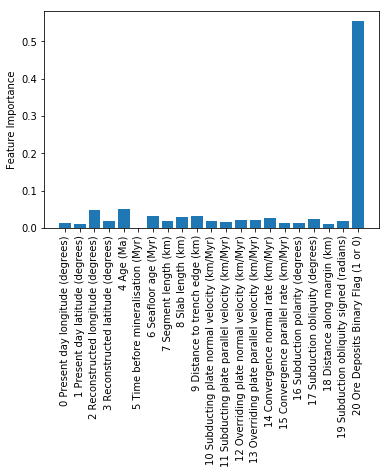

In [9]:
#Make a list of labels for our chosen features
paramColumns=np.array(ml_data.columns)
paramLabels=paramColumns[params].tolist()

#Create a new figure
fig, ax = plt.subplots()

#Plot the bar graph
rects=ax.bar(np.arange(0, datalength, step=1),rf.feature_importances_)

#Label the axes
ax.set_xticks(np.arange(0, datalength, step=1))
ax.set_xticklabels(paramLabels,rotation=90)
ax.set_ylabel('Feature Importance')

#Print the feature importance to compare with plot
np.set_printoptions(precision=3,suppress=True)
print("Importance \t Feature")
for i,label in enumerate(paramLabels):
    print("%1.3f \t\t %s" % (rf.feature_importances_[i],label))

plt.show()



Now if we can measure the tectonomagmatic properties at some point. Based on our trained classifer we can predict a probablyity that porphyry copper deposits have formed

In [10]:
#Apply the trained ML to our gridded data to determine the probabilities at each of the points
print('RF...')
pRF=np.array(rf.predict_proba(features))
print("Done RF")

RF...
Done RF


In [11]:
filename="../data/EarthByte_Zahirovic_etal_2016_ESR_r888_AgeGrid-0.nc"
data = scipy.io.netcdf.netcdf_file(filename,'r')
data.variables

OrderedDict([('lon', <scipy.io.netcdf.netcdf_variable at 0x10f31c5f8>),
             ('lat', <scipy.io.netcdf.netcdf_variable at 0x10f31cda0>),
             ('z', <scipy.io.netcdf.netcdf_variable at 0x10f313a90>)])

In [12]:
varX=data.variables['lon'][:]
varY=data.variables['lat'][:]
varZ=np.array(data.variables['z'][:])
data.close()

/Users/nbutter/anaconda3/envs/pyforgeo/lib/python3.6/site-packages/scipy/io/netcdf.py:299: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


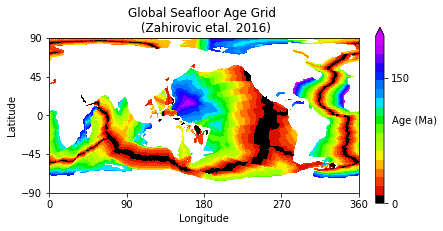

In [13]:
#Make a figure object
plt.figure()

#Get the axes of the current figure, for manipulation
ax = plt.gca()

#Create a colormap from a predefined function
age_cmap=colormap_age()

#Put down the main dataset
im=ax.imshow(varZ,vmin=0,vmax=200,extent=[0,360,-90,90],origin='lower',aspect=1,cmap=age_cmap)

#Make a colorbar
cbar=plt.colorbar(im,fraction=0.025,pad=0.05,ticks=[0, 150],extend='max')
cbar.set_label('Age (Ma)', rotation=0)

#Clean up the default axis ticks
plt.yticks([-90,-45,0,45,90])
plt.xticks([0,90,180,270,360])

#Put labels on the figure
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#Put a title on it
plt.title("Global Seafloor Age Grid \n (Zahirovic etal. 2016)")

plt.show()

In [14]:
#For loops plotting shapefiles

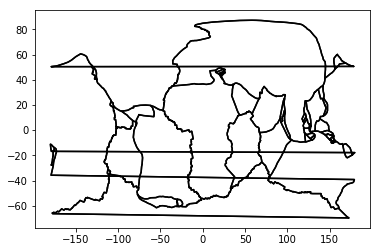

In [15]:
#Load in plate polygons for plotting
topologyFile='../data/topology_platepolygons_0.00Ma.shp'
[recs,shapes,fields,Nshp]=readTopologyPlatepolygonFile(topologyFile)
for i, nshp in enumerate(range(Nshp)):
    #if nshp!=35 and nshp!=36 and nshp!=23:
    #These are the plates that cross the dateline and cause 
        #banding errors
        polygonShape=shapes[nshp].points
        poly=np.array(polygonShape)
        plt.plot(poly[:,0], poly[:,1], c='k',zorder=1)
        
plt.show()

In [16]:
filename="../data/topodata.nc"
data = scipy.io.netcdf.netcdf_file(filename,'r')

data.variables

OrderedDict([('X', <scipy.io.netcdf.netcdf_variable at 0x1e1c26ceb8>),
             ('Y', <scipy.io.netcdf.netcdf_variable at 0x1e1c26cfd0>),
             ('elev', <scipy.io.netcdf.netcdf_variable at 0x1e1c26c080>)])

In [17]:
topoX=data.variables['X'][:]
topoY=data.variables['Y'][:]
topoZ=np.array(data.variables['elev'][:])
data.close()

/Users/nbutter/anaconda3/envs/pyforgeo/lib/python3.6/site-packages/scipy/io/netcdf.py:299: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [ ]:
#Make a prettier map

#Make the base figure
fig = plt.figure(figsize=(8,6),dpi=300)
pmap=Basemap(projection='merc',llcrnrlat=-55,urcrnrlat=10,\
            llcrnrlon=-85,urcrnrlon=-30,lat_ts=0,resolution='c')

pmap.drawmapboundary(fill_color='white')
#pmap.fillcontinents(color='grey', lake_color='white', zorder=0)
pmap.drawmeridians(np.arange(0, 360, 20),labels=[0,0,0,1],fontsize=6,color='white')
pmap.drawparallels(np.arange(-90, 90, 10),labels=[1,0,0,0],fontsize=6,color='white')

#Plot a background topography map
lons=topoX
lats=topoY
lons, lats = np.meshgrid(lons,lats)
im1 = pmap.pcolormesh(lons,lats,topoZ,shading='flat',cmap=plt.cm.gist_earth,latlon=True)
cb = pmap.colorbar(im1,"right", size="5%", pad="2%",extend='both',ticks=[-2000,0,2000])
plt.clim(-5000,4000)
cb.set_label('Height (m)',labelpad=-25)

#Plot a background Agegrid map (on top of topo)
lons=varX
lats=varY
lons, lats = np.meshgrid(lons,lats)
#Make the NaNs clear
intensity = np.ma.masked_where(np.isnan(varZ), varZ)
im1 = pmap.pcolormesh(lons,lats,intensity,shading='flat',cmap=age_cmap,latlon=True)
cb = pmap.colorbar(im1,"right", size="5%", pad="60%",extend='max',ticks=[0,200])
plt.clim(0,200)
cb.set_label('Age (Ma)',labelpad=-20)


#Load in plate polygons for plotting
topologyFile='../data/topology_platepolygons_0.00Ma.shp'
[recs,shapes,fields,Nshp]=readTopologyPlatepolygonFile(topologyFile)
for i, nshp in enumerate(range(Nshp)):
    if nshp!=35 and nshp!=36 and nshp!=23:
    #These are the plates that cross the dateline and cause 
        #banding errors
        polygonShape=shapes[nshp].points
        poly=np.array(polygonShape)
        xh, yh = pmap(poly[:,0], poly[:,1])
        plt.plot(xh, yh, c='w',zorder=1)


#Plot the ore deposit Age
# xh, yh = pmap(ml_data_np[ml_data_np[:,-1]==1,0],ml_data_np[ml_data_np[:,-1]==1,1])
# l2 = pmap.scatter(xh, yh, 20, marker='.',c=ml_data_np[ml_data_np[:,-1]==1,4],cmap=plt.cm.hsv,zorder=3)
# cbar=pmap.colorbar(l2,location='bottom',pad="5%",ticks=[0,50,100,150],extend='max')
# plt.clim(0,170)
# cbar.set_label('Age of Deposit (Ma)')

#Plot the ore deposit probability
xh, yh = pmap(ml_data_np[ml_data_np[:,-1]==1,0],ml_data_np[ml_data_np[:,-1]==1,1])
l2 = pmap.scatter(xh, yh, 20, marker='.',c=pRF[:147,1],cmap=plt.cm.copper,zorder=3)
cbar=pmap.colorbar(l2,location='bottom',pad="5%",ticks=[0,0.5,1])
plt.clim(0,1)
cbar.set_label('Prediction Probability (%)')

   
plt.show()

/Users/nbutter/anaconda3/envs/pyforgeo/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nbutter/anaconda3/envs/pyforgeo/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/nbutter/anaconda3/envs/pyforgeo/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nbutter/anaconda3/envs/pyforgeo/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
